#### A: Знай свои данные! Визуализация зависимой переменной (1)
В этом задании мы проанализируем данные по выданным кредитам. Очень часто бинарная логистическая регрессия применяется в медицинских данных, чтобы предсказать болезнь или успех какого-либо лекарства или операции. Вторая по популярности сфера - это банковская сфера. Аналитики банковской сферы часто пытаются проанализировать, каким клиентам стоит выдавать кредит, а каким нет. Но сегодня мы посмотрим на это с немного другой перспективы. Мы знаем, что клиенты, приходящие за кредитом, проходят процедуру его одобрения. Банк может одобрить получение кредита, а может не одобрить. Сегодня мы проанализируем, каков шанс человека получить одобрение на кредит в зависимости от разных зависимых переменных. Для этого у нас есть подходящий датафрейм.

Как мы выяснили из предыдущих разделов, перед тем как что-то анализировать, стоит узнать, что мы имеем изначально. Здесь без визуализации никуда.

Зависимой переменной выступает 'Loan_Status', в которой 0 – кредит не одобрен, а 1 – кредит одобрен. Все переменные находятся в объекте loan.

С помощью пакета pandas постройте бар чарт, отражающий распределение бинарной переменной. Напомним, что он строится следующим образом:

Объектсданными['Переменная'].value_counts().plot(kind='bar')

Что мы можем сказать о выбранной зависимой переменной? Важно! Для решения задачи необходимо использовать пакеты pandas и matplotlib.pyplot. Чтобы мы могли проверить результат, вам нужно сохранить его особенным способом:

plt.savefig('result.png')

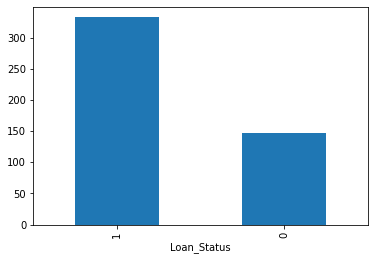

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('loan.csv')

df['Loan_Status'].value_counts().plot(kind='bar')

plt.savefig('result.png')

#### B: Знай свои данные! Визуализация зависимой переменной (2)
Теперь узнаем, каковы распределения категориальных переменных, которые мы будем анализировать.

Нам следует проверить следующие гипотезы:

1. Мужчинам чаще одобряют кредиты, чем женщинам.
2. У заявителей с высшим образованием выше шанс одобрения кредита, чем у тех, кто не имеет высшего образования.

Перед построением модели, посмотрим, как они выглядят. Начнем с бинарной переменной брачного статуса.

С помощью пакета pandas визуализируйте распределение заявителей по брачному статусу (переменная 'Married'). Все переменные находятся в объекте loan.

Важно! Для решения задачи необходимо использовать пакеты pandas и matplotlib.pyplot. Чтобы мы могли проверить результат, вам нужно сохранить его особенным способом:

plt.savefig('result.png')

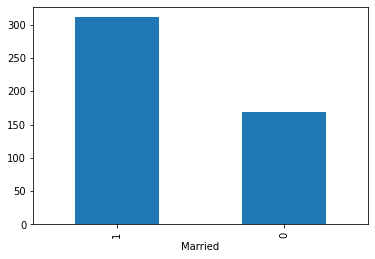

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('loan.csv')

df['Married'].value_counts().plot(kind='bar')

plt.savefig('result.png')

#### C: Знай свои данные! Визуализация зависимой переменной (3)
Теперь проверим переменную образования ('Education'). Постройте второй график, где будет видно распределение заявителей по наличию и отсутствию высшего образования (переменная Education).

Переменные все ещё записаны в объекте loan.

Важно! Для решения задачи необходимо использовать пакеты pandas и matplotlib.pyplot. Чтобы мы могли проверить результат, вам нужно сохранить его особенным способом:

plt.savefig('result.png')

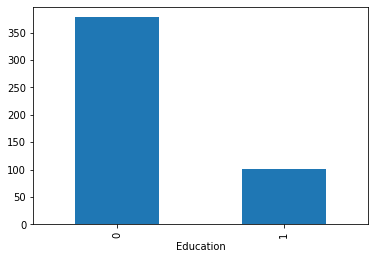

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('loan.csv')

df['Education'].value_counts().plot(kind='bar')

plt.savefig('result.png')

#### D: Знай свои данные! Визуализация независимых переменных (4)
Важно узнать, зависит ли от размера требуемого займа шанс получения одобрения кредита. Для этого нам придется в будущем включить в модель переменную размера кредита. Проверьте распределение количества запрашиваемых денег (переменная 'LoanAmount' в объекте loan) с помощью гистограммы.

В matplotlib это команда plt.hist().

Важно! Для решения задачи необходимо использовать пакеты pandas и matplotlib.pyplot. Чтобы мы могли проверить результат, вам нужно сохранить его особенным способом. Вместо plt.show() добавьте в конец файла:

plt.savefig('result.png')

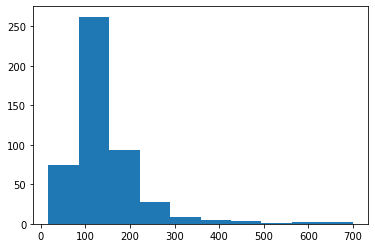

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('loan.csv')

plt.hist(df['LoanAmount'])

plt.savefig('result.png')

#### E: Построение логистической регрессии (1)
Построим модель логистической регрессии и включим туда одну переменную. Для начала проверим, как изменяется шанс на одобрение кредита в зависимости от размера запрашиваемой суммы. Зависимая переменная – 'Loan_Status', независимая переменная – 'LoanAmount'.

Все переменные находятся в объекте loan.

Запишите модель в объект model. Логистическая модель записывается следующим образом: sm.GLM(зависимая переменная, независимая переменная, family=families.Binomial().fit() Команда print(model.summary()) поможет вам познакомится с результатами построения модели.

Помните, что в изначальной выдаче нам доступны логарифмированные коэффициенты. С помощью команды exp из пакета numpy посмотрите на отношения шансов. В качестве ответа запишите результаты выдачи этой команды.

Формат ввода
#ваш код для построения модели#{br} print(np.exp(название вашей модели.params))

Формат вывода
LoanAmount 0.035189{br} dtype: float64

In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod import families
import numpy as np

df = pd.read_csv('loan.csv')

model = sm.GLM(
    df["Loan_Status"],
    df["LoanAmount"],
    family=families.Binomial(),
).fit()

print(np.exp(model.params))

LoanAmount    1.004036
dtype: float64


#### F: Построение логистической регрессии (2)
Отлично! Теперь добавим остальные переменные брачного статуса ('Married') и переменной наличия высшего образования ('Education').

Добавьте в лист с зависимыми переменными перечисленные выше показатели. Все переменные находятся в объекте loan.

Команда print(model.summary()) поможет вам познакомится с результатами построения модели. Показатель Log_Likelihood у предыдущей модели -309.91. Сравните значения показателей и определите какая модель наилучшая по этому показателю? Что изменилось в переменных при добавлении двух других?

Помните, что в изначальной выдаче нам доступны логарифмированные коэффициенты. С помощью команды exp из пакета numpy посмотрите на отношения шансов. В качестве ответа запишите результаты выдачи этой команды.

Формат ввода
#ваш код для построения модели#{br} print(np.exp(название вашей модели.params))

Формат вывода
LoanAmount 0.035189{br} Married 1.421331{br} Education 0.023138{br} dtype: float64

In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod import families
import numpy as np

df = pd.read_csv('loan.csv')

model = sm.GLM(
    df["Loan_Status"],
    df[["LoanAmount", 'Married', 'Education']],
    family=families.Binomial(),
).fit()

print(np.exp(model.params))

LoanAmount    1.001195
Married       2.226661
Education     0.865475
dtype: float64


#### G: Диагностика логистической модели
Настало время проверить, хорошая ли наша модель. Начнем с проверки мультиколлинеарности. Действительно ли все наши наблюдения независимы? Для того, чтобы это проверить, нам понадобится показатель VIF.

Если какая-либо из переменных показывает VIF больше 4, то нам следует задуматься об исключении какой-либо из них.

Создайте обхект X. Запишите в него все переменные из данных loan.

Показатель VIF рассчитывается с помощью следующих последовательностей:

Создается пустой датафрейм. `vif_data = pd.DataFrame()`

Внутри него создаются колонки с переменными, выделенными в объекте `X`. `vif_data["feature"] = X.columns`

Рассчитывается показатель `VIF` с помощью следующей функции: `vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]`

Выводится таблица со значениями `VIF` при помощи команды `print`.

In [8]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('loan.csv')

X = df[['LoanAmount', 'Married', 'Education']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

      feature       VIF
0  LoanAmount  2.183028
1     Married  2.294270
2   Education  1.181951


#### H: Проверка отклоняющихся значений
Теперь проверим, есть ли в нашей модели наблюдения, которые резко скашивают результаты нашей модели. Для этого нужно построить график влиятельных отклонений.

Из объекта, в котором записана модель, достаньте влиятельные значения с помощью функции get_influence. Запишите их в объект infl.

Создайте график дистанции Кука в модели. Запишите в объект fig следующее: Примените plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean()) к объекту infl. Выведите график с помощью следующей команды с параметром pad=1.0: fig.tight_layout(pad=1.0)

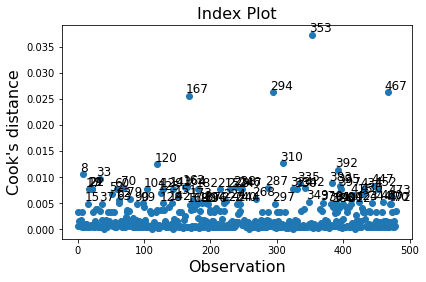

In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod import families
import matplotlib.pyplot as plt

df = pd.read_csv('loan.csv')

model = sm.GLM(
    df["Loan_Status"],
    df[["LoanAmount", 'Married', 'Education']],
    family=families.Binomial(),
).fit()

infl = model.get_influence()
fig = infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())
fig.tight_layout(pad=1.0)

plt.savefig('result.png')

#### I: ROC кривая. Точность модели
Но рано делать выводы. Теперь посмотрим, имеет ли наша модель предсказательную силу и хорошо ли она классифицирует данные.

Достаньте предсказанные значения из модели с помощью model.predict, запишите в объект prob_pred. Посмотрите, как классифицируются данные по предсказанным значениям с помощью команды roc_auc_score. Первым аргументом указывается зависимая переменная из датасета loan, а вторым – предсказанные значения.

Определите показатели верноположительных и верноотрицательных значений, предсказанных моделью. Запишите их в строке объектов fpr, tpr, threshold. Приравняйте к ним функцию roc_curve(pd.to_numeric(зависимая переменная),предсказанные вероятности).

Далее запустите код matplotlib с построением графика.

Важно! Чтобы мы могли проверить результат, вам нужно сохранить его особенным способом. Вместо plt.show() добавьте в конец файла:

plt.savefig('result.png')

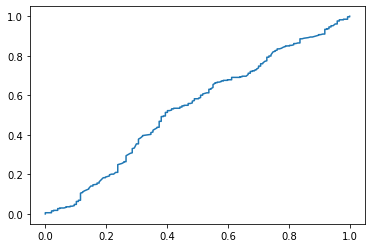

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod import families
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

df = pd.read_csv('loan.csv')

X = df[['LoanAmount', 'Married', 'Education']]
y = df['Loan_Status']

model = sm.GLM(y, X, family=families.Binomial()).fit()

prob_pred = model.predict(X)

auc = roc_auc_score(y, prob_pred)

fpr, tpr, threshold = roc_curve(pd.to_numeric(y), prob_pred)

plt.plot(fpr, tpr)
plt.savefig('result.png')